### Connect to database

In [24]:
import psycopg2

In [2]:
con = psycopg2.connect(user = "postgres",
                       password = "",
                       host = "127.0.0.1",
                       port = "5432",
                       database = "adj_noun_pairs")

try:
    cursor = con.cursor();
except (Exception, psycopg2.Error) as error:
    print("Error in Connection",error)

## Finding similarities of words

### Extracting nouns and a list of adjectives associated with each noun

In [ ]:
import itertools
import time
from datetime import timedelta, datetime
from collections import defaultdict

In [14]:
try:
    cursor.execute("SELECT DISTINCT noun, STRING_AGG(adjective, ',') FROM all_pairs_counts WHERE noun IN (SELECT noun FROM all_pairs_counts WHERE count >= 3 GROUP BY noun HAVING COUNT(*) >= 5) GROUP BY noun")
    adjectives_listed = cursor.fetchall() 
except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)

In [15]:
len(adjectives_listed)

12772

In [17]:
dict_words = {}

for tup in adjectives_listed:
    dict_words[tup[0]] = tup[1].split(',')

In [21]:
noun_pairs = list(itertools.combinations(dict_words.keys(), 2))
len(noun_pairs)

81555606

In [25]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

similarities = defaultdict(dict)

for pair in noun_pairs:
    first_word = pair[0]
    second_word = pair[1]
    similarity = len(set(dict_words[first_word]) & set(dict_words[second_word]))/len(set(dict_words[first_word]) | set(dict_words[second_word]))
    
    similarities[first_word][second_word] = similarity
    similarities[second_word][first_word] = similarity
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

16:35:25.608074
17:49:56.580016
1:14:30.991316


### t-SNE on similarity matrix

In [31]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [27]:
df = pd.DataFrame(similarities)
df = df.reindex(sorted(df.columns), axis=1)
df = df.reindex(sorted(df.index), axis=0)
df = df.fillna(1)

In [28]:
df

,A-klass,A-rühm,B-grupp,Bondi-film,C-vitamiin,CD-plaat,CN-kood,EM-finaalturniir,EM-tsükkel,EM-valikmäng,...,šiiit,šokk,šokolaad,šotlane,šveitslane,šveitslanna,žanr,žest,žürii,ω-3-rasvhape
A-klass,1.000000,0.093750,0.021978,0.042254,0.036364,0.072581,0.034091,0.011765,0.047619,0.021505,...,0.026316,0.055814,0.080000,0.039216,0.035714,0.026316,0.019685,0.031746,0.042553,0.025974
A-rühm,0.093750,1.000000,0.061538,0.086957,0.034483,0.028302,0.015152,0.050847,0.050000,0.059701,...,0.044944,0.051813,0.044304,0.022727,0.045455,0.018868,0.026201,0.020339,0.037559,0.018519
B-grupp,0.021978,0.061538,1.000000,0.057971,0.130000,0.039370,0.022727,0.075949,0.101695,0.119048,...,0.045045,0.027273,0.016216,0.046358,0.055046,0.040541,0.040323,0.015674,0.038298,0.054054
Bondi-film,0.042254,0.086957,0.057971,1.000000,0.044444,0.097087,0.059701,0.064516,0.121951,0.056338,...,0.031915,0.045455,0.036810,0.045113,0.010526,0.000000,0.039130,0.020067,0.051402,0.035088
C-vitamiin,0.036364,0.034483,0.130000,0.044444,1.000000,0.047945,0.047170,0.009524,0.023810,0.017699,...,0.045802,0.042194,0.082902,0.034682,0.030303,0.020833,0.041045,0.036036,0.035156,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
šveitslanna,0.026316,0.018868,0.040541,0.000000,0.020833,0.008621,0.000000,0.044776,0.000000,0.012821,...,0.041237,0.014423,0.011696,0.075188,0.123596,1.000000,0.008299,0.000000,0.026906,0.000000
žanr,0.019685,0.026201,0.040323,0.039130,0.041045,0.056738,0.036437,0.020325,0.017621,0.023622,...,0.060150,0.050938,0.044248,0.045161,0.040741,0.008299,1.000000,0.086475,0.067708,0.020921
žest,0.031746,0.020339,0.015674,0.020067,0.036036,0.028249,0.035370,0.009554,0.010204,0.018750,...,0.035714,0.065116,0.050000,0.048387,0.029674,0.000000,0.086475,1.000000,0.053097,0.023102
žürii,0.042553,0.037559,0.038298,0.051402,0.035156,0.055762,0.025424,0.030435,0.043269,0.033613,...,0.055118,0.064789,0.065831,0.050847,0.042969,0.026906,0.067708,0.053097,1.000000,0.026786


In [29]:
## Change similarity matrix to distance matrix
dist_df = df.apply(lambda x: 1 - x)

In [30]:
dist_df

,A-klass,A-rühm,B-grupp,Bondi-film,C-vitamiin,CD-plaat,CN-kood,EM-finaalturniir,EM-tsükkel,EM-valikmäng,...,šiiit,šokk,šokolaad,šotlane,šveitslane,šveitslanna,žanr,žest,žürii,ω-3-rasvhape
A-klass,0.000000,0.906250,0.978022,0.957746,0.963636,0.927419,0.965909,0.988235,0.952381,0.978495,...,0.973684,0.944186,0.920000,0.960784,0.964286,0.973684,0.980315,0.968254,0.957447,0.974026
A-rühm,0.906250,0.000000,0.938462,0.913043,0.965517,0.971698,0.984848,0.949153,0.950000,0.940299,...,0.955056,0.948187,0.955696,0.977273,0.954545,0.981132,0.973799,0.979661,0.962441,0.981481
B-grupp,0.978022,0.938462,0.000000,0.942029,0.870000,0.960630,0.977273,0.924051,0.898305,0.880952,...,0.954955,0.972727,0.983784,0.953642,0.944954,0.959459,0.959677,0.984326,0.961702,0.945946
Bondi-film,0.957746,0.913043,0.942029,0.000000,0.955556,0.902913,0.940299,0.935484,0.878049,0.943662,...,0.968085,0.954545,0.963190,0.954887,0.989474,1.000000,0.960870,0.979933,0.948598,0.964912
C-vitamiin,0.963636,0.965517,0.870000,0.955556,0.000000,0.952055,0.952830,0.990476,0.976190,0.982301,...,0.954198,0.957806,0.917098,0.965318,0.969697,0.979167,0.958955,0.963964,0.964844,0.862069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
šveitslanna,0.973684,0.981132,0.959459,1.000000,0.979167,0.991379,1.000000,0.955224,1.000000,0.987179,...,0.958763,0.985577,0.988304,0.924812,0.876404,0.000000,0.991701,1.000000,0.973094,1.000000
žanr,0.980315,0.973799,0.959677,0.960870,0.958955,0.943262,0.963563,0.979675,0.982379,0.976378,...,0.939850,0.949062,0.955752,0.954839,0.959259,0.991701,0.000000,0.913525,0.932292,0.979079
žest,0.968254,0.979661,0.984326,0.979933,0.963964,0.971751,0.964630,0.990446,0.989796,0.981250,...,0.964286,0.934884,0.950000,0.951613,0.970326,1.000000,0.913525,0.000000,0.946903,0.976898
žürii,0.957447,0.962441,0.961702,0.948598,0.964844,0.944238,0.974576,0.969565,0.956731,0.966387,...,0.944882,0.935211,0.934169,0.949153,0.957031,0.973094,0.932292,0.946903,0.000000,0.973214


In [40]:
# start 18:05
tsne = TSNE(random_state=17, metric='precomputed')
tsne_results = tsne.fit_transform(dist_df.values)

In [33]:
np.save('tsne_results_all.npy', tsne_results)

In [41]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])

18:08:26.057548


### Visualisation of t-SNE results

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patheffects as PathEffects
%matplotlib inline

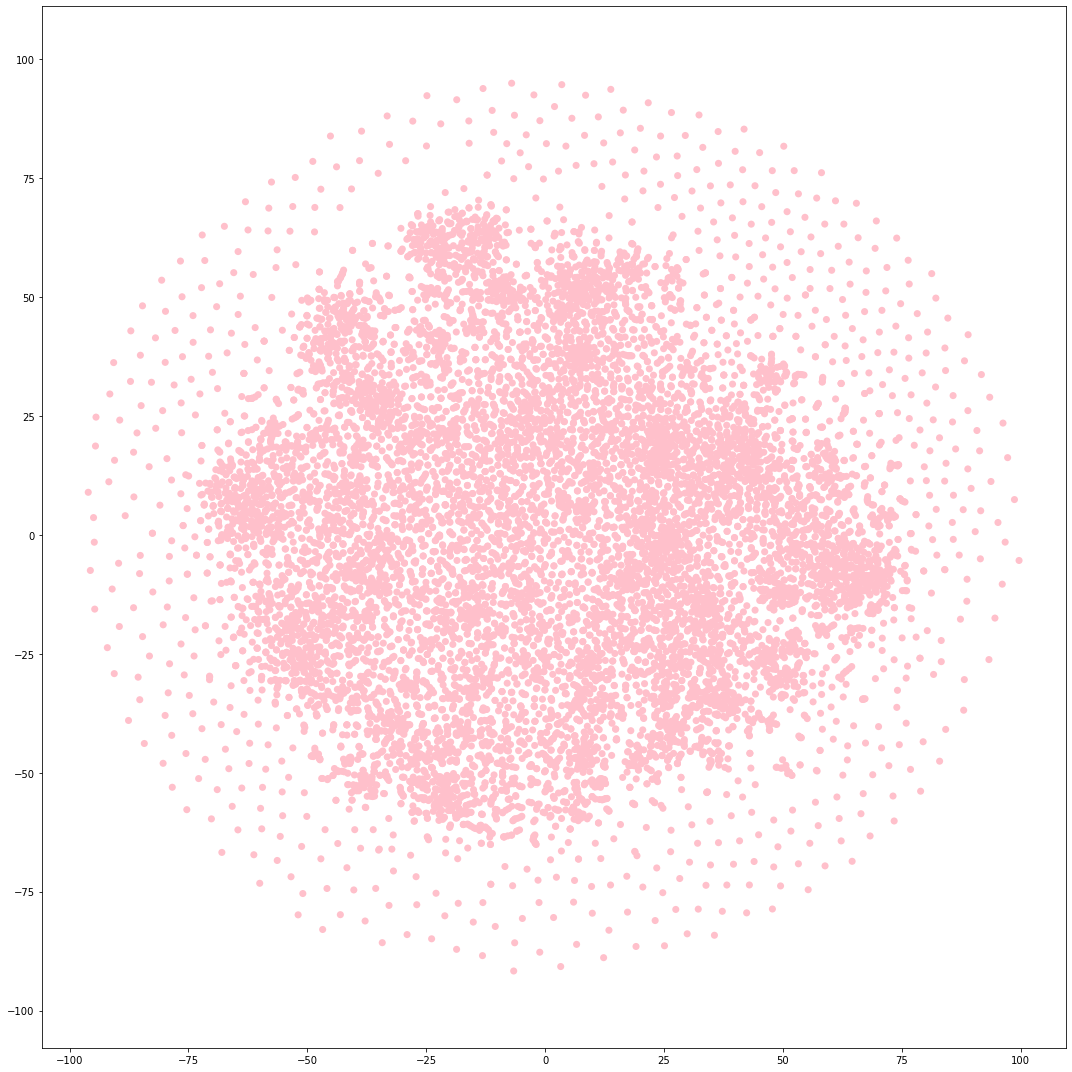

In [46]:
# With results obtained from distance matrix
plt.figure(figsize=(15, 15))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], marker='o', s=50, edgecolor='None', c='pink')

plt.tight_layout()
plt.axis('equal')
plt.show()

---

In [44]:
tsne2 = TSNE(random_state=17)
tsne_results2 = tsne2.fit_transform(df.values)

In [49]:
np.save('tsne_results_all_without_precomputed.npy', tsne_results2)

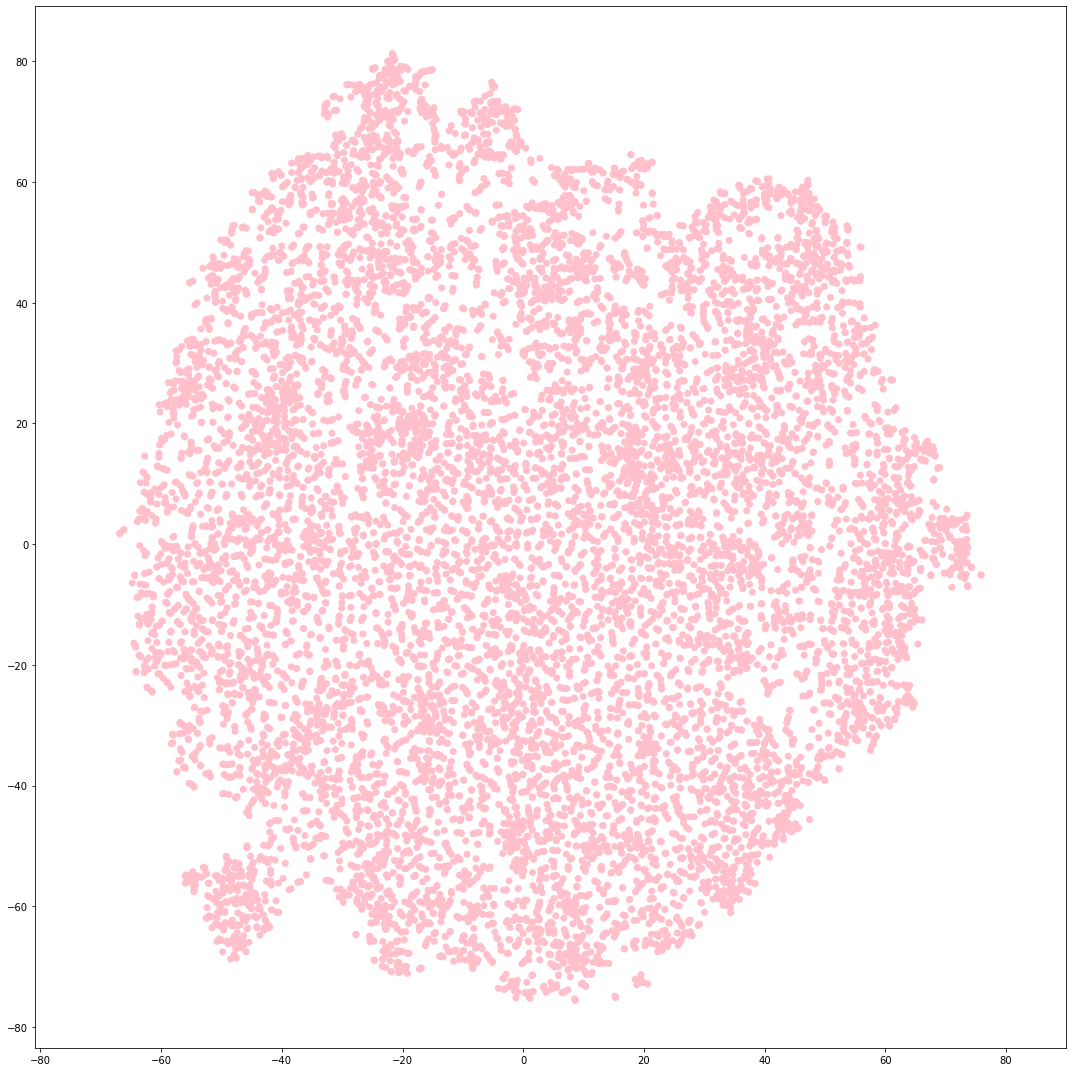

In [45]:
plt.figure(figsize=(15, 15))
plt.scatter(tsne_results2[:, 0], tsne_results2[:, 1], marker='o', s=50, edgecolor='None', c='pink')

plt.tight_layout()
plt.axis('equal')
plt.show()